<a id="TableOfContents"></a>
# TABLE OF CONTENTS:
<li><a href='#imports'>Imports</a></li>
<li><a href="#acquire">Acquire</a></li>
<li><a href="#prepare">Prepare</a></li>
<li><a href="#explore">Explore</a></li>
<li><a href="#models">Top 3 Models</a></li>
<li><a href="#conclusion">Conclusion</a></li>

##### Orientation:
- Overview
    - Utilizing the 'telco_churn' dataframe, find what drivers there are to customer churn
- Goals
    - Using telco data from MySQL
    - Clean data for use in jupyter notebook
    - Explore data for any significant features
    - Create model to predict customer churn

<a id='imports'></a>
# Imports:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Remove unwanted warning banners
import warnings
warnings.filterwarnings('ignore')

# .py files
import acquire
import prepare
import presentation

<a id='acquire'></a>
# Acquire:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### Methodology:
1. Using MySQL
    - Check dataframe and tables
    - Combine all tables with a single query
2. Using Python
    - Create SQL connection URL
    - Copy SQL query
3. Acquire telco data
    - pd.read_sql(query, url)

In [2]:
# Using the 'acquire.py' import...
# Acquire the 'telco_churn' via SQL query and read as pandas dataframe
# Get a sample of the imported dataframe
acquire.get_telco_data().sample()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,churn_month,signup_date,contract_type,internet_service_type,payment_type
3120,1,3,3,4475-NVTLU,Male,0,Yes,Yes,45,Yes,...,No internet service,No,19.2,903.7,No,NaN,2018-04-21,Two year,None,Electronic check


##### Justification:
Simply want to acquire all the data from the SQL database

THEREFORE:
- JOIN ALL TABLES

<a id='prepare'></a>
# Prepare:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [14]:
# Using the 'prepare.py' import...
# Take the dataframe and prepare it for exploration and modeling
# Add new/agg/dummy columns
# Fix dtypes of incorrect columns
telco = prepare.prep_telco()
telco.shape

(7043, 100)

##### Justification:
Want to prepare data for exploration and modeling purposes

THEREFORE:
- Fix total_charges
    - 'object' to 'float'
- Fix churn_month
    - 'object' to 'datetime'
- Fix signup_date
    - 'object' to 'datetime'
- Break down signup_date
    - sign_year
        - Detect trends on a yearly basis
    - sign_month
        - Detect trends on a monthly basis
    - sign_day
        - Detect trends on a daily basis
    - sign_dayofweek
        - Detect trends on a day of the week basis
- Create total_services
    - Aggregate services per customer
        - phone_service_Yes
        - multiple_lines_Yes
        - online_security_Yes 
        - online_backup_Yes
        - device_protection_Yes
        - tech_support_Yes
        - streaming_tv_Yes
        - streaming_movies_Yes 
        - internet_service_type_DSL 
        - internet_service_type_Fiber optic
    - Detect trends of total services count
- Create total_extra_services
    - Aggregate extra services per customer
        - online_security_Yes 
        - online_backup_Yes
        - device_protection_Yes
        - tech_support_Yes
        - streaming_tv_Yes
        - streaming_movies_Yes 
    - Detect trends of extra services count
- Create value_per_total_services
    - Aggregate total_services / monthly_charges
    - Detect trends of cost per overall services
- Create value_per_total_extra_services
    - Aggregate total_extra_services / monthly_charges
    - Detect trends of cost per extra services
- Create dummies
    - Easier to explore/model object columns as dummy values

<a id='explore'></a>
# Explore:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### Question:
- What are some major drivers of churn and is there any relationship between them?

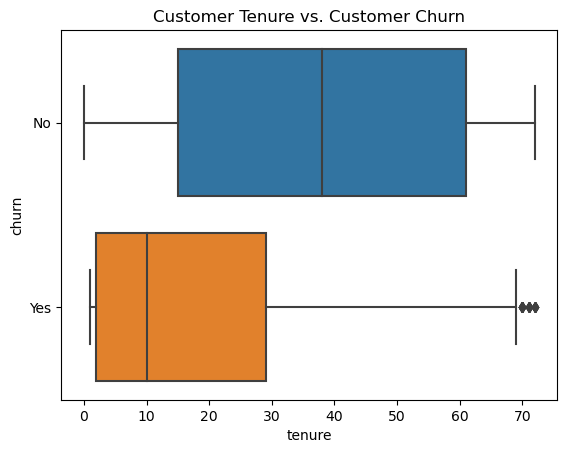

Tenure p_val: 1.28e-176



In [4]:
# Using the 'presentation.py' import...
# Visualize 'tenure' vs. 'churn'
presentation.explore1()

##### How long do customers that churn stay?
- Churn tends to be within 30 months

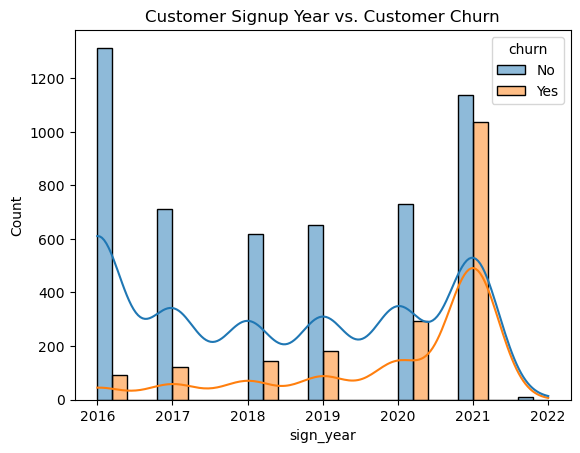

Signup Year p_val: 2.93e-188



In [5]:
# Using the 'presentation.py' import...
# Visualize 'sign_year' vs. 'churn'
presentation.explore2()

##### Are customers churning from specific years?
- Churn has increased over time
- Churn spiked in 2021
- Assuming data is from 2022, this mostly aligns with tenure vs. churn

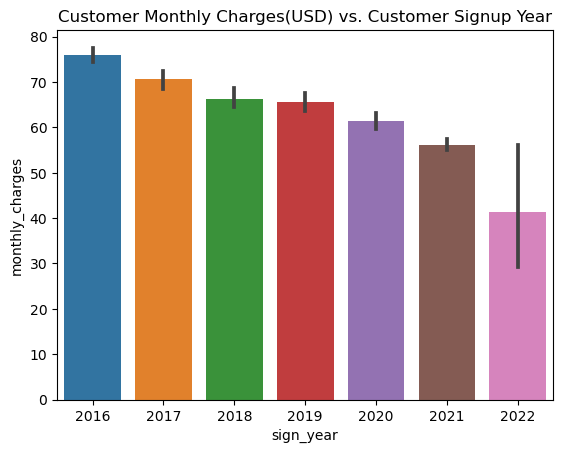

In [12]:
# Using the 'presentation.py' import...
# Visualize 'sign_year' vs. 'monthly_charges'
presentation.explore3()

##### Curious to see if monthly charges spiked in 2021?
- Interestingly, monthly charges has been steadily decreasing

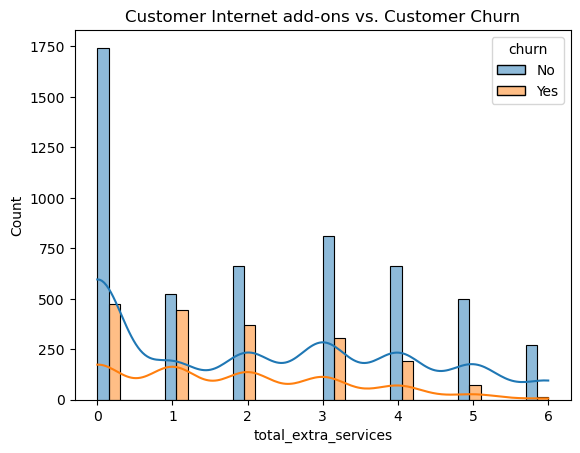

Total Extra Services p_val: 2.47e-81



In [7]:
# Using the 'presentation.py' import...
# Visualize 'total_extra_services' vs. 'churn'
presentation.explore4()

- Extra services focused on internet services:
    - Online Security 
    - Online backup
    - Device Protection
    - Tech Support
    - Streaming TV
    - Streaming Movies

##### Do our extra services impact customers?
- Having no extra services keep customers better than those that have them
- Particularly having 1 seem to do the worst

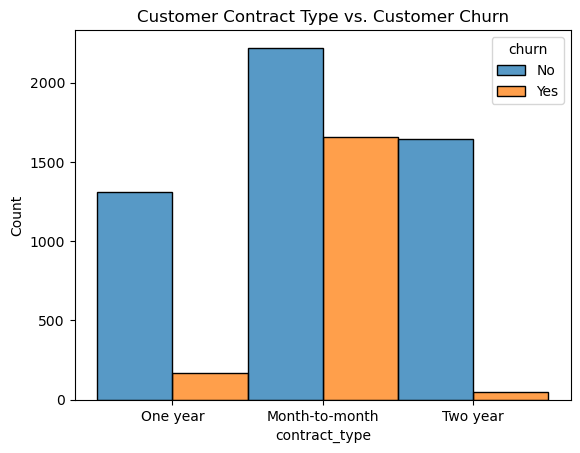

Contract Type p_val: 5.86e-258



In [8]:
# Using the 'presentation.py' import...
# Visualize 'contract_type' vs. 'churn'
presentation.explore5()

##### Does contract types impact customers?
- Month-to-Month contracts perform significantly worse

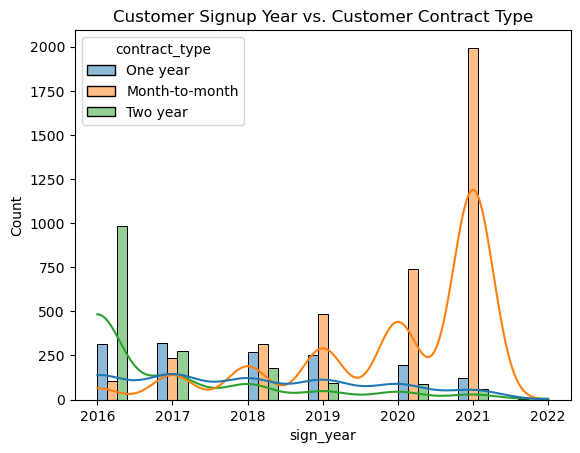

In [9]:
# Using the 'presentation.py' import...
# Visualize 'total_extra_services' vs. 'churn'
presentation.explore6()

##### Is there a pattern with contract types?
- One Year and Two Year contracts steadily decreased overtime
- Month-to-Month increased overtime with a spike in 2021

### Takeaway:
- Major churn factors:
    - Tenure
    - Signup Year
    - Extra Internet Services
    - Contract Type
    - Not an all inclusive list
- Interesting Relationships:
    - More customers are churning even though monthly charges are decreasing
    - More customers favor month-to-month contracts as time went on

<a id='models'></a>
# Top 3 Models:
<li><a href='#TableOfContents'>Table of Contents</a></li>

- RFC Model 7
- LR Model 1
- DTC Model 3

### Steps:
- Feature selection:
    - Strongest features:
        - 'online_security_No'
        - 'online_backup_No'
        - 'device_protection_No'
        - 'tech_support_No'
        - 'contract_type_Month-to-month'
        - 'internet_service_type_Fiber_optic'
        - 'payment_type_Electronic_check'
        - 'sign_year'
        - 'tenure'
        - 'value_per_total_services'
- Hyperparameters:
    - 'For loop' for different depths
- Model selection:
    - Compare 'train', 'val', 'diff' scores then get the 'test' score
- TN/TP:
    - Using a confusion_matrix
    - Compare the TN and TP rates

In [10]:
# Using the 'presentation.py' file...
# Acquire the top 3 models and put their scores in a pandas dataframe
presentation.top3models()

,model,test,"TP(""No"")","TN(""Yes"")"
0,actual,100.0,100.0,100.0
1,baseline,73.5,73.5,0.0
2,RFC,78.0,83.2,60.5
3,LR,77.5,83.7,58.3
4,DTC,76.8,79.4,61.6


- For overall score:
    - Random Forest Classifier
        - 78.0%
        - +4.5%
- For True Positives ('No'):
    - Logistic Regression
        - 83.7%
        - +10.2%
- For True Negatives ('Yes'):
    - Decision Tree Classifier
        - 61.6%
        - +61.6%

##### Justification:
Want to find the top 3 performing models to predict customer churn.

THEREFORE:
- Top model for...
    - Overall score:
        - If someone does not care whether or not someone churned, but want the best performing model overall
    - TP('No'/DID NOT CHURN):
        - If someone only cares to predict customers that will not churn
    - TN('Yes'/DID CHURN):
        - If someone only cares to predict customers that will churn

<a id='conclusion'></a>
# Conclusion:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### Recommendations
- Focus advertisement efforts towards families and couples and avoid older population
- Market offers as single services or bundled services with at least 3 additional services
- For customers, that want internet services
    - Get them to go with DSL services
    - Minimum add-ons of 3
- For paying customers:
    - Do not allow monthly contracts
    - Do not allow electronic check forms of payment
    
### Takeaways
- Target audience:
    - Couples
    - Families/Dependents
    - Non-senior citizen
- Services Emphasis:
    - Internet Services:
        - No internet or DSL
        - If internet, then bundle at least 3 add-ons
- Payments:
    - DO NOT ALLOW ELECTRONIC CHECK
- Contracts:
    - DO NOT ALLOW MONTH CONTRACT
    
### If I Had More Time
- For customer service:
    - Why does everyone only signup on the 21st of any given month/year
    - Why did everyone churn on 31JAN2022
    - What happened in 2021
    - Assess customer comments/sentiment:
        - Are our services adequate for their price
        - Are our services performing properly or breaking
        - Why did the customer signup/churn
- For marketing:
    - What are the prices of all services/bundles we provide
    - What advertisements are we running
- Further exploration:
    - Why is month-to-month contract popular
    - Why is tenure getting shorter, but monthly charges dropping
    - Are extra services necessary or a burden
    - Compare local competition if any
    - Establish local 'common knowledge'/'norm'

In [11]:
# Using the 'presentation.py' file...
# Create a predictions.csv file using the best model
presentation.pred_csv()

,customer_id,probability_yes,prediction
1247,1845-ZLLIG,0.470563,No
7011,9945-PSVIP,0.022921,No
2647,3761-FLYZI,0.307281,No
6149,8711-LOBKY,0.005221,No
5797,8164-OCKUJ,0.004823,No
...,...,...,...
6534,9278-VZKCD,0.323293,No
2010,2898-MRKPI,0.130405,No
570,0839-QNXME,0.011527,No
362,0531-ZZJWQ,0.444156,No
